# Scikit-Learn

## Exploratory analysis

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)

In [2]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.3.x

1.3.2


---

### Classification (digits)

Let's look at the classification model performance in terms of precision and recall.

#### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [3]:
digits = datasets.load_digits()

In [4]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

data = digits.images.reshape([n_samples, -1])

print(data.shape, digits.target.shape)

(1797, 8, 8)
(1797, 64) (1797,)


In [5]:
df = pd.DataFrame(data, columns=[f"p_{i+1}" for i in range(data.shape[1])])
df["label"] = digits.target
df

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_56,p_57,p_58,p_59,p_60,p_61,p_62,p_63,p_64,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [6]:
df.describe()  # .loc[:, "p_10":"p_20"]

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_56,p_57,p_58,p_59,p_60,p_61,p_62,p_63,p_64,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Randomly select the training and test dataset.

<span style="color:red">Implement your solution below and comment briefly</span>

In [7]:
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    data, digits.target, random_state=1
)

print(train_ys.shape, train_xs.shape)
print(test_ys.shape, test_xs.shape)

(1347,) (1347, 64)
(450,) (450, 64)


#### Train the models

Train the model using, e.g., the [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implement your solution below</span>

In [8]:
# 2. Instantiation
model = naive_bayes.GaussianNB()

# 3. Learn (fit) the model
model.fit(train_xs, train_ys)

# 4. Predict on new data
pred_ys = model.predict(test_xs)

#### Evaluate

Evaluate with the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Then give a more complete result, including precision, recall and f1-score with the method [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implement your solution below</span>

In [9]:
score = metrics.accuracy_score(test_ys, pred_ys)
print(f"{score :.2f}")

0.85


In [10]:
print(metrics.classification_report(test_ys, pred_ys))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.81      0.81      0.81        42
           2       0.93      0.66      0.77        41
           3       0.93      0.77      0.84        52
           4       0.93      0.91      0.92        47
           5       0.94      0.85      0.89        39
           6       0.96      1.00      0.98        43
           7       0.80      1.00      0.89        48
           8       0.51      0.95      0.67        37
           9       1.00      0.62      0.77        48

    accuracy                           0.85       450
   macro avg       0.88      0.85      0.85       450
weighted avg       0.89      0.85      0.86       450



In [11]:
scores_dic = metrics.classification_report(test_ys, pred_ys, output_dict=True)
scores_df = pd.DataFrame(scores_dic)
scores_df

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.980769,0.809524,0.931034,0.930233,0.934783,0.942857,0.955556,0.800000,0.514706,1.000000,0.853333,0.879946,0.888366
recall,0.962264,0.809524,0.658537,0.769231,0.914894,0.846154,1.000000,1.000000,0.945946,0.625000,0.853333,0.853155,0.853333
f1-score,0.971429,0.809524,0.771429,0.842105,0.924731,0.891892,0.977273,0.888889,0.666667,0.769231,0.853333,0.851317,0.856509
support,53.000000,42.000000,41.000000,52.000000,47.000000,39.000000,43.000000,48.000000,37.000000,48.000000,0.853333,450.000000,450.000000


In [12]:
scores_dic = metrics.classification_report(test_ys, pred_ys, output_dict=True)
scores_df = pd.DataFrame(scores_dic).transpose()  # .style.set_precision(2)

with pd.option_context("display.float_format", "{:.3g}".format):
    display(scores_df)

,precision,recall,f1-score,support
0,0.981,0.962,0.971,53
1,0.81,0.81,0.81,42
2,0.931,0.659,0.771,41
3,0.93,0.769,0.842,52
4,0.935,0.915,0.925,47
5,0.943,0.846,0.892,39
6,0.956,1,0.977,43
7,0.8,1,0.889,48
8,0.515,0.946,0.667,37
9,1,0.625,0.769,48


In [13]:
with pd.option_context("display.float_format", "{:.2g}".format):
    display(scores_df.precision)

0              0.98
1              0.81
2              0.93
3              0.93
4              0.93
5              0.94
6              0.96
7               0.8
8              0.51
9                 1
accuracy       0.85
macro avg      0.88
weighted avg   0.89
Name: precision, dtype: float64

#### Confusion matrix

Use the class [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
to display the confusion matrix.

Briefly comment on the results.

Note that the `.confusion_matrix` attribute of the created object allows to obtain the confusion matrix in the form of an array.

<span style="color:red">Implement your solution below and comment briefly</span>

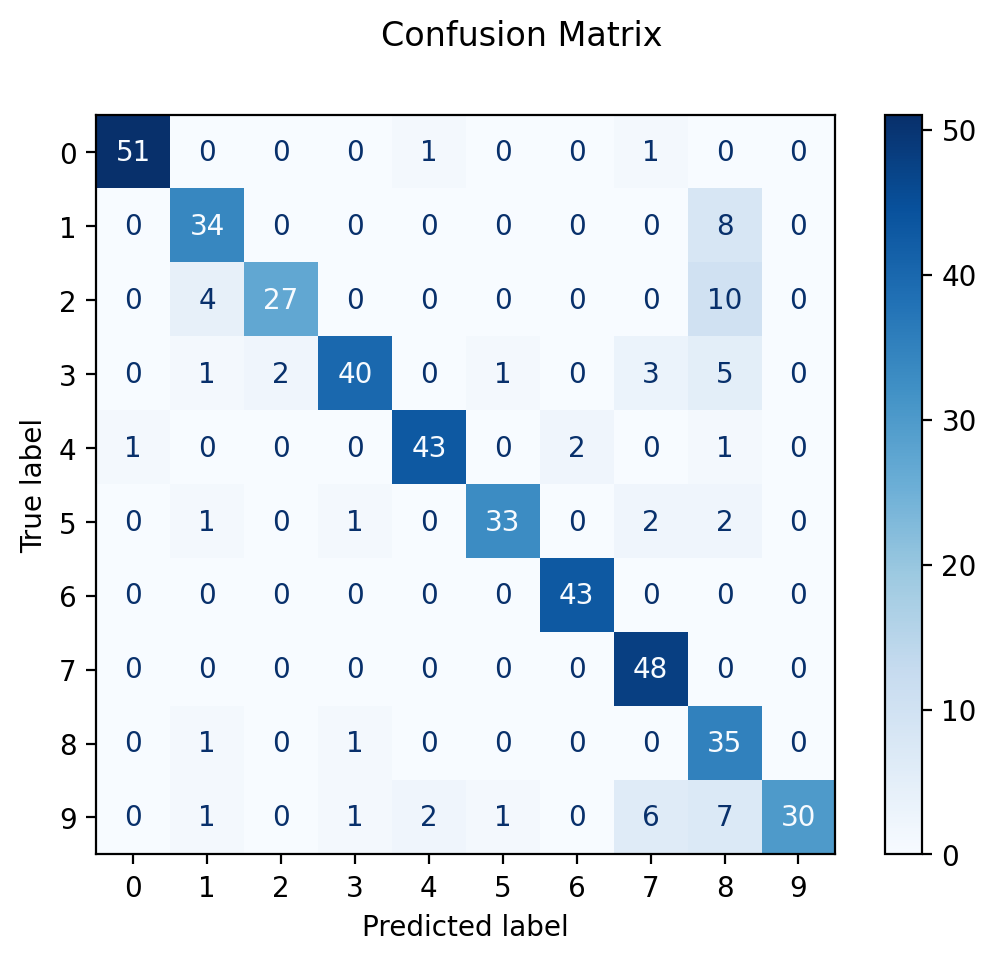

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    model, test_xs, test_ys, cmap=plt.cm.Blues
)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [15]:
print(f"Confusion matrix:\n\n{disp.confusion_matrix}")

Confusion matrix:

[[51  0  0  0  1  0  0  1  0  0]
 [ 0 34  0  0  0  0  0  0  8  0]
 [ 0  4 27  0  0  0  0  0 10  0]
 [ 0  1  2 40  0  1  0  3  5  0]
 [ 1  0  0  0 43  0  2  0  1  0]
 [ 0  1  0  1  0 33  0  2  2  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  0  0 35  0]
 [ 0  1  0  1  2  1  0  6  7 30]]


#### Error visualization

Identify the most confusing cases.

Identify misclassified instances for the lowest f1-scoring cipher class and visualize them with the code below.

You may use the function [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find the index of the concerned instances.

<span style="color:red">Implement your solution below and comment briefly</span>

In [16]:
(indexes,) = np.where((test_ys == 1) & (test_ys != pred_ys))
indexes

array([ 21,  65, 114, 203, 270, 333, 371, 416])

In [17]:
def plot_digit(idx, xs, ys=None, pred_ys=None):
    if ys is not None:
        print(f"Digit value:\t{ys[idx]}")
    if pred_ys is not None:
        print(f"Prediction:\t{pred_ys[idx]}")

    plt.figure(figsize=(3, 3))
    plt.imshow(
        xs[idx].reshape(8, -1),
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )

Digit value:	1


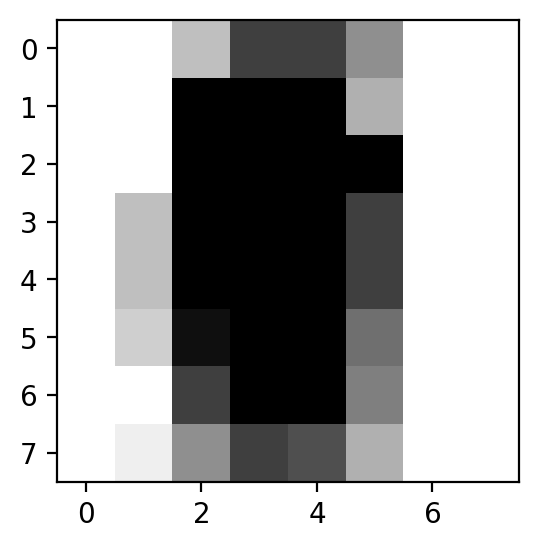

In [18]:
plot_digit(idx=21, xs=test_xs, ys=test_ys)

---

### PCA

Try to reduce the number of features through the ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), by choosing, e.g., the 10 first principal components.

**Note on standardization:** 

It is usually important (for tabular dataset) to standardize the data before applying PCA, since it takes into account the variance of the data to set the principal components.

Though in the case of images, each feature uses the same scale (pixel intensity), so it is not necessary to standardize the data. It could even be harmful, since the variance of each pixel would be set to 1, which would bring much noise in the data, especially for the low-intensity pixels (like the corners).

#### PCA and training/evaluation data selection

<span style="color:red">Implement your solution below and comment briefly</span>

In [19]:
N_COMP = 10

pca = decomposition.PCA(n_components=N_COMP)
train_xps = pca.fit_transform(train_xs)
test_xps = pca.transform(test_xs)

print(train_xs.shape, test_xs.shape)
print(train_xps.shape, test_xps.shape)

(1347, 64) (450, 64)
(1347, 10) (450, 10)


#### Model training

<span style="color:red">Implement your solution below and comment briefly</span>

In [20]:
# 2. Instantiation
model = naive_bayes.GaussianNB()

# 3. Learn (fit) the model
model.fit(train_xps, train_ys)

# 4. Predict on new data
yps_pred = model.predict(test_xps)

#### Evaluation

<span style="color:red">Implement your solution below and comment briefly</span>

In [21]:
score = metrics.accuracy_score(test_ys, yps_pred)
print(f"{score :.2f}")

print(metrics.classification_report(test_ys, yps_pred))

0.91
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.73      0.88      0.80        42
           2       0.95      0.85      0.90        41
           3       0.96      0.83      0.89        52
           4       0.98      1.00      0.99        47
           5       0.88      0.95      0.91        39
           6       1.00      1.00      1.00        43
           7       0.90      0.96      0.93        48
           8       0.86      0.81      0.83        37
           9       0.88      0.88      0.88        48

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.92      0.91      0.91       450



---

### Cross-Validation

![](img/grid_search_cross_validation.png)

#### Data preparation

Use the function [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to implement cross-validation.

You may choose to do 10 splits (`cv=10`).

Choose as *scoring* `"f1_weighted"`, then the function will return the corresponding scores in an array.

By way of example and in order to be able to compare the results with the previous ones, the first application will be done on the entire dataset (which is usually not recommended).

<span style="color:red">Implement your solution below and comment briefly</span>

In [22]:
SCORINGS = "f1_weighted"

xps = np.vstack([train_xps, test_xps])
yps = np.hstack([train_ys, test_ys])

scores = model_selection.cross_val_score(
    model, xps, yps, cv=10, scoring=SCORINGS
)
with np.printoptions(precision=2):
    print(scores)

print(f"\n{SCORINGS}: {scores.mean():.3f}, with std dev: {scores.std():.3f}\n")

[0.94 0.9  0.88 0.89 0.94 0.89 0.92 0.9  0.91 0.91]

f1_weighted: 0.908, with std dev: 0.020



Show the results with a [`plt.bar`] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) which includes an error bar `yerr` equal to 1 [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), as well as in a [`boxplot`](https://matplotlib.org/stable/api/_as_gen/ matplotlib.pyplot.boxplot.html).

<span style="color:red">Implement your solution below and comment briefly</span>

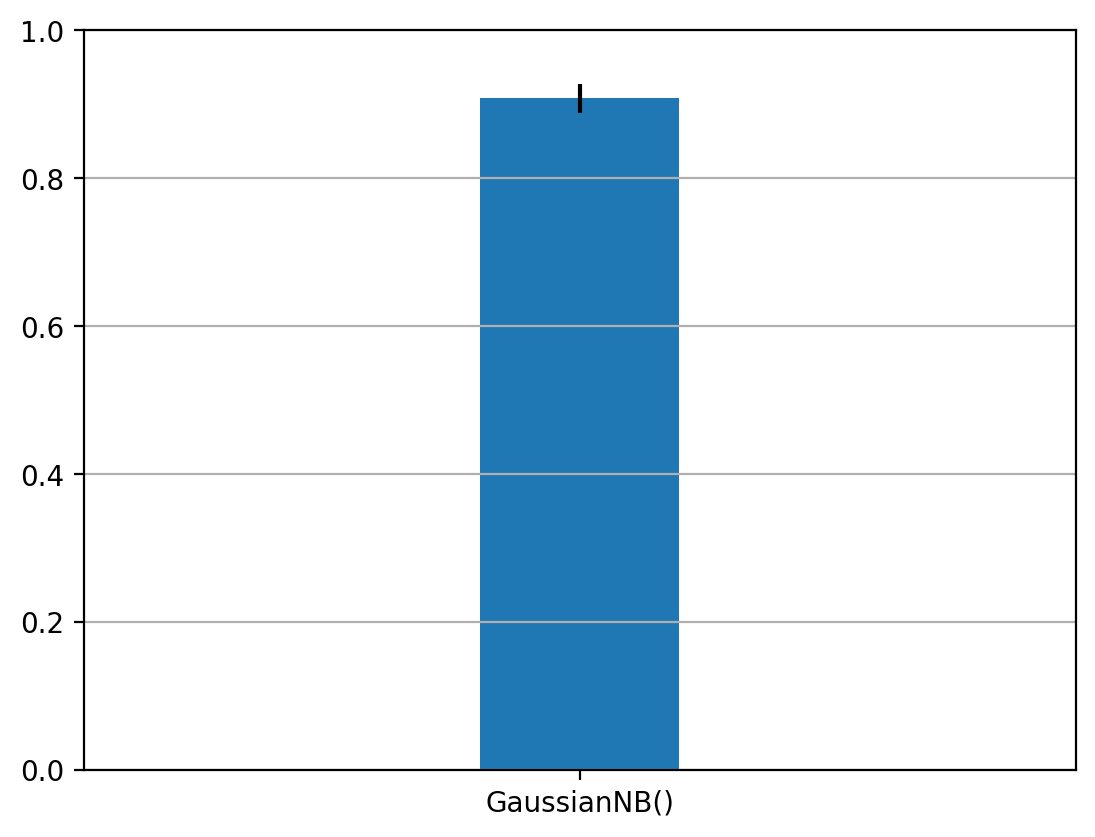

In [24]:
plt.bar([str(model)], scores.mean(), yerr=scores.std())
plt.xlim(-2, 2)
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()

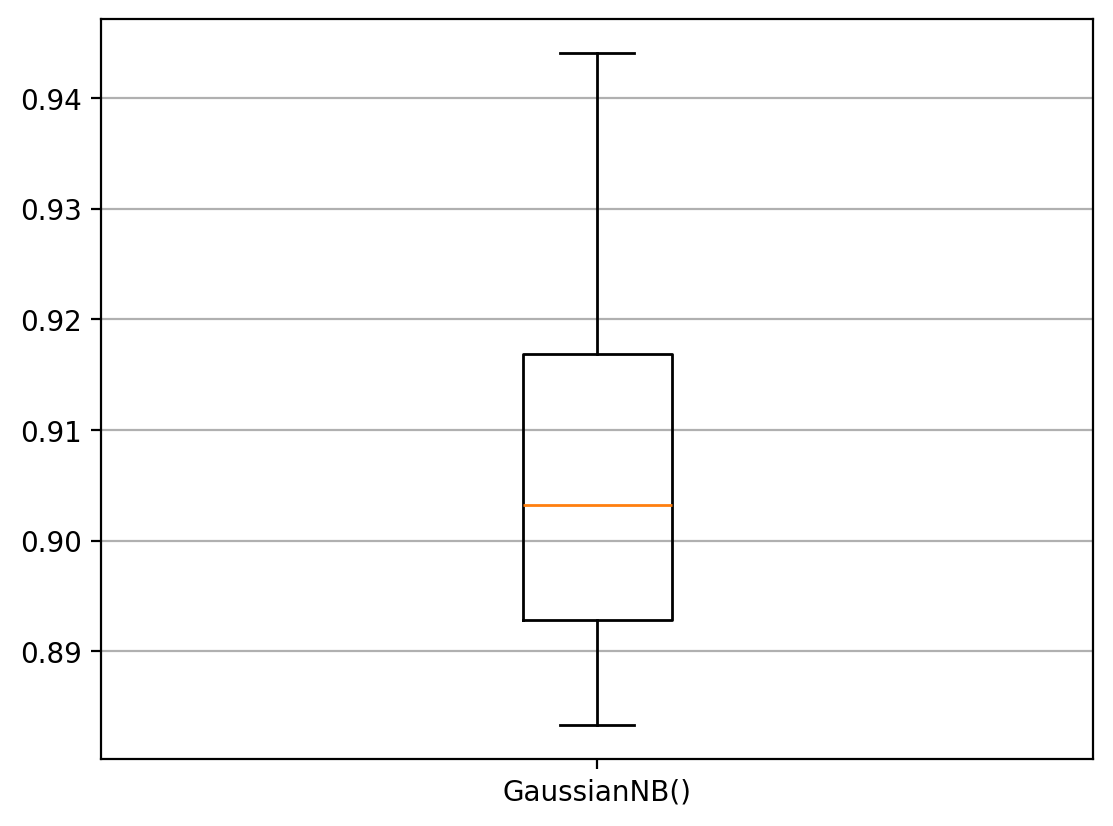

In [25]:
plt.boxplot(scores)
plt.xticks([1], [str(model)])
plt.grid(axis="y")
plt.show()

---

### Grid Search

This time, we are going to use cross-validation for one of its primary use: to validate the choice of hyperparameters.

We will use the class
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best number of main components for the PCA.

This class makes it possible to test several hyperparameters (stored in a dictionary) and to test them via cross-validation (hence the CV in the name).

To do this, we no longer need to worry about creating the different subsets, the `GridSearchCV` class does it for us.

In [26]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

We're going to use a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do PCA compression and training with the model together, which will allow us to modify the hyperparameters at any step of the process through a single command.

We will have to use the exact names of the hyperparameters to modify in the dictionary, preceded by the name of the module and a double *underscore* (e.g., here: `"pca__"`), in order to be able to assign them to the right step of the `pipeline`.

<span style="color:red">Implement your solution below and comment briefly</span>

In [28]:
# Define the pipeline

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

scaler = sklearn.preprocessing.StandardScaler()
pca = decomposition.PCA()
model = naive_bayes.GaussianNB()

pipe = pipeline.Pipeline(
    steps=[
        # ("scaler", scaler),  # As explained above, scaling decreases performance
        ("pca", pca),
        ("model", model),
    ]
)

In [29]:
# Define the gridsearch using the pipeline and fit the model

# Parameters of pipelines can be set using ‘__’ separated parameter names:

search = model_selection.GridSearchCV(
    pipe, param_grid, n_jobs=-1, scoring=SCORINGS, verbose=1, cv=10
)

search.fit(data, digits.target)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [1, 2, 5, 10, 20, 30, 40, 60]},
             scoring='f1_weighted', verbose=1)

In [30]:
# Print the best prediction score obtained
# and its corresponding hyperparameter value

print(f"Best parameter (CV score: {search.best_score_:.3f})")

print(search.best_params_)

cv_results_df = pd.DataFrame(search.cv_results_)

with pd.option_context("display.float_format", "{:.2g}".format):
    display(cv_results_df)

Best parameter (CV score: 0.916)
{'pca__n_components': 30}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024,0.0052,0.0062,0.0029,1,{'pca__n_components': 1},0.3,0.37,0.25,0.28,0.32,0.28,0.36,0.3,0.3,0.28,0.3,0.036,8
1,0.019,0.0027,0.0059,0.0007,2,{'pca__n_components': 2},0.54,0.68,0.59,0.64,0.66,0.59,0.62,0.57,0.58,0.58,0.6,0.042,7
2,0.017,0.0037,0.0042,0.00078,5,{'pca__n_components': 5},0.83,0.88,0.79,0.82,0.84,0.77,0.83,0.83,0.75,0.84,0.82,0.035,6
3,0.01,0.00069,0.0031,0.00032,10,{'pca__n_components': 10},0.88,0.92,0.89,0.87,0.89,0.9,0.93,0.96,0.84,0.87,0.89,0.031,4
4,0.014,0.0016,0.0036,0.00049,20,{'pca__n_components': 20},0.88,0.95,0.89,0.9,0.89,0.91,0.96,0.97,0.85,0.91,0.91,0.035,3
5,0.019,0.0015,0.0043,0.00063,30,{'pca__n_components': 30},0.89,0.94,0.9,0.93,0.89,0.91,0.97,0.97,0.85,0.9,0.92,0.036,1
6,0.031,0.0063,0.0056,0.00097,40,{'pca__n_components': 40},0.88,0.92,0.91,0.93,0.89,0.91,0.97,0.94,0.87,0.9,0.91,0.028,2
7,0.016,0.0042,0.0041,0.001,60,{'pca__n_components': 60},0.87,0.9,0.88,0.75,0.82,0.85,0.92,0.94,0.8,0.85,0.86,0.056,5


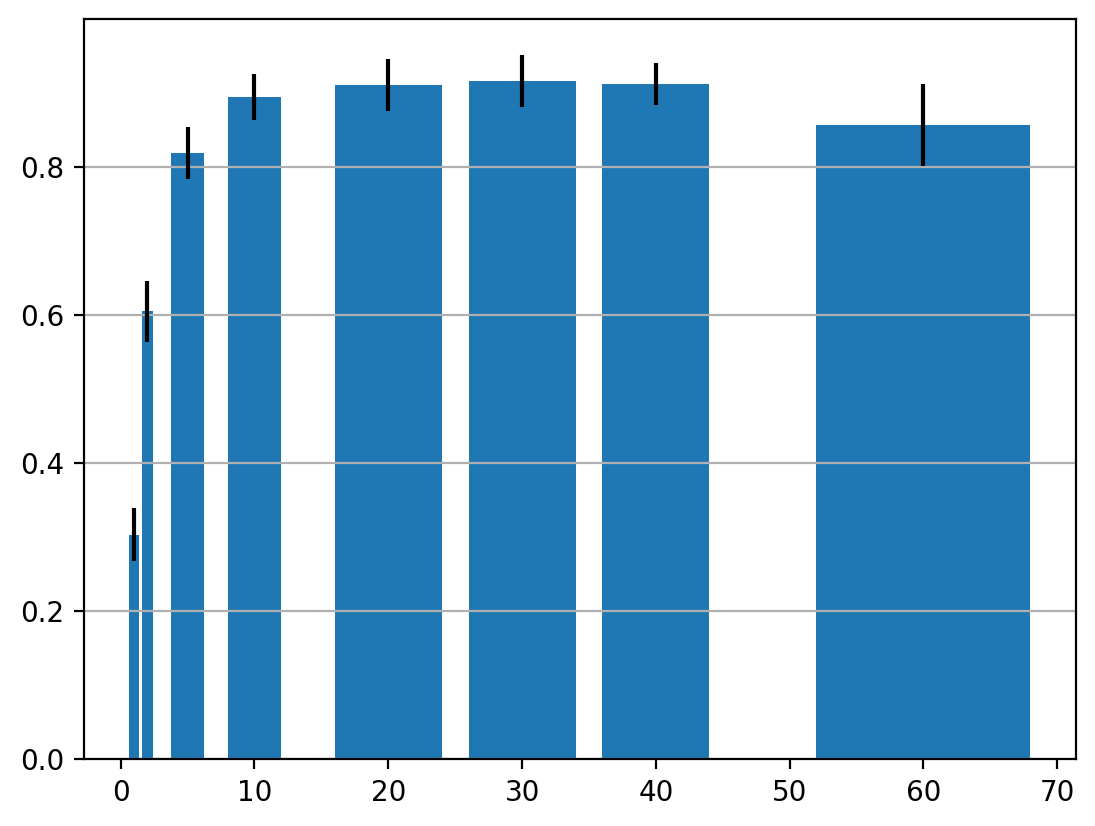

In [31]:
# Plot a bar plot (or boxplot) showing the different prediction scores
# for each tested hyperparameter
# (including the error bars if bar plots are chosen)

param = search.cv_results_["param_pca__n_components"]

plt.bar(
    search.cv_results_["param_pca__n_components"],
    search.cv_results_["mean_test_score"],
    yerr=search.cv_results_["std_test_score"],
    width=0.8
    * np.diff(search.cv_results_["param_pca__n_components"].data, prepend=0),
)
plt.grid(axis="y")
plt.show()

## Further exercises

Using the `.predict_proba` method of` linear_model.LogisticRegression`, use the result of the prediction to select a particular threshold (*threshold*) to influence the classification performances.

*   Can you get 100% [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?
*   Can you get 100% of [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)?
*   Measure the values of [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and comment.
*   Plot the [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from multiple threshold values.
*   Compare the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (area under the ROC curve) of the `linear_model.LogisticRegression` and of `naive_bayes. GaussianNB()`.

<span style="color:red">Implement your solution below and comment briefly</span>

---